# Yessica Alejandra Gomez Rivera /817073 

# Analitica de Datos 

# Taller
Consiste en montar los siguientes clasificadores y probarlos en la clasificación de dos Gaussianas en 2D según la plantilla en :

https://github.com/amalvarezme/AnaliticaDatos/blob/master/multivariateNormal.ipynb

y la explicación desarrollada en las clases según el documento de apoyo

https://github.com/amalvarezme/AnaliticaDatos/blob/master/3_DeteccionClasificacionGH/03S_4_ClasificadoresBayes.pdf

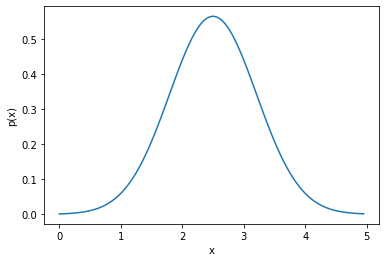

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.spatial.distance import mahalanobis
import numpy as np
from scipy.stats import multivariate_normal as mn

x = np.linspace(0, 5, 100, endpoint=False)
y = mn.pdf(x, mean=2.5, cov=0.5)
plt.xlabel('x')
plt.ylabel('p(x)')

plt.plot(x, y)

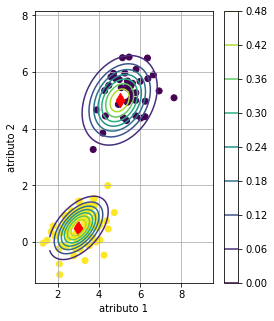

In [ ]:
#clase 1 
mu1 = np.array([5,5]) #.fit -> estimar la mu1
cov1 = np.array([[0.8, 0.2],[0.2,0.6]]) #.fit -> estimar la cov1
N1 = 40 # numero puntos c1 -> estimar desde etiquetas
pdf1 = mn(mu1, cov1) # objeto scipy para evaluar o muestrear gaussiana multivariada


#clase 2
mu2 = np.array([3,0.5]) #.fit -> estimar la mu1
cov2 = np.array([[0.5, 0.2],[0.2,0.3]]) #.fit -> estimar la cov1
N2 = 100 # numero puntos c1 -> estimar desde etiquetas
pdf2 = mn(mu2, cov2) # objeto scipy ara evaluar o muestrear gaussiana multivariada

X = np.r_[pdf1.rvs(size=N1),pdf2.rvs(size=N2)] # muestrear de las dos pdfs los datos (NO hacer esto-los datos X los ingresa el usuario)
y = np.r_[-1.0*np.ones((N1,1)),np.ones((N2,1))] #etiquetas, -1 y +1 para el problema binario

#myclass_cBayes().fit(Xtrain,ytrain), Xtrain Ntrain x P,  ytrain Ntrain

xx, yy = np.mgrid[1.25*min(X[:,0]):1.25*max(X[:,0]):.01, 1.25*min(X[:,1]):1.25*max(X[:,1]):.01] #graficar pdf en espacio de caract. 2D
pos = np.empty(xx.shape + (2,))
pos[:, :, 0] = xx; pos[:, :, 1] = yy

plt.figure(figsize=(4,5))
plt.scatter(X[:,0],X[:,1], c=y)
plt.scatter(mu1[0],mu1[1], c='r', marker='d',s = 100)
plt.scatter(mu2[0],mu2[1], c='r', marker='d',s = 100)
plt.contour(xx, yy, pdf1.pdf(pos))
plt.contour(xx, yy, pdf2.pdf(pos))
plt.colorbar()
plt.grid()
plt.xlabel('atributo 1')
plt.ylabel('atributo 2')
plt.show()


In [ ]:
x.shape + (2,)

(100, 2)

$$\Sigma_c = \begin{bmatrix} \sigma^{c,2}_1 & cov^c(1,2) & \cdots & cov^c(1,P)\\
cov^c(2,1) & \sigma^{c,2}_2 & \cdots & cov^c(2,P)\\
\vdots   & \vdots & \ddots & \vdots \\
cov^c(P,1) & cov^c(P,2) & \cdots & \sigma^{c,2}_P
\end{bmatrix}$$

In [ ]:
pdf1.pdf(mu1)

0.23993510443917412

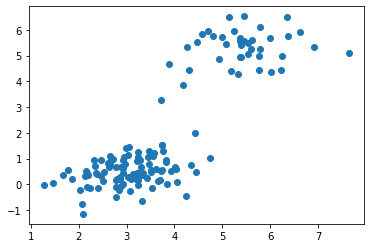

In [ ]:
ye = np.c_[pdf1.pdf(X),pdf2.pdf(X)] #transform -> evaluar pdf despues de encontrar mu_c y Cov_c

plt.scatter(X[:,0],X[:,1]) 

(795, 960, 2)


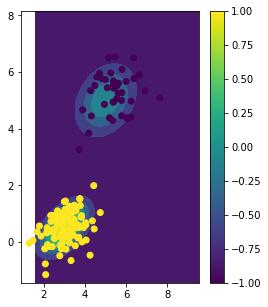

In [ ]:
# predict
dc1 = pdf1.pdf(pos) # pdf1.pdf(Xtest)
dc2 = pdf2.pdf(pos) # pdf2.pdf(Xtest)
pb = np.zeros((dc1.shape[0],dc2.shape[1],2))
pb[:,:,0] = dc1 #* (N1/X.shape[0]) #marginal cada clase
pb[:,:,1] = dc2 #* (N2/X.shape[0])
#ytest_e = pb.argmax(axis=2) # etiquetas estimadas

print(pb.shape)
plt.figure(figsize=(4,5))
plt.contourf(xx, yy,pb.max(axis=2))
plt.scatter(X[:,0],X[:,1], c=y)
plt.colorbar()

In [ ]:
pb.shape

(795, 960, 2)

In [ ]:
X.shape

(140, 2)

In [ ]:
y.shape

(140, 1)

# Clasificador ingenuo (naive - bayes )






$$p(x,A)=\prod _{ j=1 }^{ P }{ p(xj|A) } p(A); p(x,B)=\prod _{ j=1 }^{ P }{ p(xj|B)p(B) }$$

$$p(A), p(B)$$

$${ y }_{ new\quad  }=\quad {{ arg\quad max }_{ { A }_{ C } }\quad  }\quad \prod _{ j=1 }^{ p }{ p(xj|{ A }_{ C } } )p({ A }_{ C })$$

In [ ]:
# estimacion priors (cuantos elementos distuntos hay (inique))
clases = np.unique(y)

In [ ]:
clases

array([-1.,  1.])

In [ ]:
# numero de clases 
nc = len(clases)

In [ ]:
nc

2

In [ ]:
prior = np.zeros((nc))
medias=np.zeros((nc,X.shape[1])) #tamaño de caracteristicas, matris por clase y es 2X2
varianza=np.zeros((nc,X.shape[1]))
j=0
for c in clases:
  prior[j]=sum(y==c)/len(y)
  medias[j]=X[(y==c).reshape(-1)].mean(axis=0)
  varianza[j]=X[(y==c).reshape(-1)].var(axis=0)
  j+=1


In [ ]:
prior

array([0.28571429, 0.71428571])

In [ ]:
medias

array([[5.41146548, 5.26782464],
       [3.0279033 , 0.49036164]])

In [ ]:
varianza

array([[0.64171492, 0.50198111],
       [0.46640971, 0.27899542]])

In [ ]:
X[0]

array([5.18306525, 4.38633625])

In [ ]:
resultadoa = np.zeros(len(y))
resultadob = np.zeros(len(y))
tmp_list = np.zeros(nc)
y_predict = np.zeros(len(y))

In [ ]:
Xnew1_ = X
for i in range(len(y)):
  px = mn.pdf(Xnew1_[i,0], mean=medias[0,0], cov=varianza[0,0])*prior[0]
  py = mn.pdf(Xnew1_[i,1], mean=medias[0,1], cov=varianza[0,1])*prior[0]
  resultadoa[i] = px*py
  px2 = mn.pdf(Xnew1_[i,0], mean=medias[1,0], cov=varianza[1,0])*prior[1]
  py2 = mn.pdf(Xnew1_[i,1], mean=medias[1,1], cov=varianza[1,1])*prior[1]
  resultadob[i] = px2*py2
  if resultadoa[i] >= resultadob[i]:
    y_predict[i] = -1
  else:
    y_predict[i] = 1


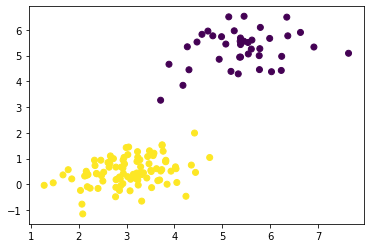

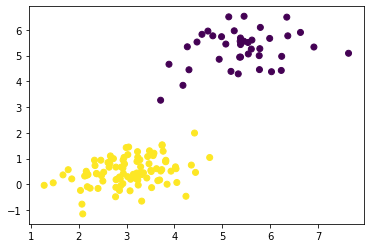

In [ ]:
ind = y.reshape(-1)!=y_predict.reshape(-1)
ind.shape
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()
plt.scatter(X[:,0],X[:,1],c=y_predict)
plt.scatter(X[ind,0],X[ind,1],c="r")
plt.show()

Una de las mayores ventajas que Naive Bayes tiene sobre otros algoritmos 
de clasificación es la capacidad de manejo de un número extremadamente grande de características.
También, se comporta bien incluso ante la presencia de características irrelevantes y no es relativamente afectado por ellos.
La otra ventaja principal es su relativa simplicidad. Naive Bayes funciona bien desde el principio y ajustar sus parámetros es raramente necesario.
Raramente sobreajusta los datos.
Otra ventaja importante es que su modelo de entrenamiento y procesos de predicción son muy rápidos teniendo en cuenta la cantidad de datos que puede manejar.


# Clasificador cuadratico bayesiano

$$L(x)=p(x|A)p(A)-p(x|B)p(B)=0$$

$$\frac { p(x|A) }{ p(x|B) } =\frac { p(B) }{ p(A) } \Rightarrow log\left( \frac { p(x|A) }{ p(x|B) }  \right) =log\left( \frac { p(B) }{ p(A) }  \right)$$
$$log(p(x|A))-log(p(x|B))=log(p(B)/p(A)$$

$$R(x)=log(p(x|A))-log(p(x|B))-log(p(B)/p(A))$$

$$p(x|A)=\frac { 1 }{ 2\prod { \frac { p }{ 2 }  } { |\sum { A } | }^{ \frac { 1 }{ 2 }  } } exp\left( { \frac { -1 }{ 2 } (x-{ \mu  }_{ A }) }^{ T }{ \sum { A }  }^{ -1 }(x-{ \mu  }_{ A }) \right) $$
$$p(x|B)=\frac { 1 }{ 2\prod { \frac { p }{ 2 }  } { |\sum { B } | }^{ \frac { 1 }{ 2 }  } } exp\left( { \frac { -1 }{ 2 } (x-{ \mu  }_{ B }) }^{ T }{ \sum { B }  }^{ -1 }(x-{ \mu  }_{ B }) \right) $$
$$log(p(x|A))=-\frac { p }{ 2 } log(2\Pi )-\frac { 1 }{ 2 } log(|\sum { A } |)$$
$$-\frac { 1 }{ 2 } { (x-{ \mu  }_{ A }) }^{ T }{ \sum { A }  }^{ -1 }{ (x-{ \mu  }_{ A }) }$$
$$R(x)=-\frac { 1 }{ 2 } { (x-{ \mu  }_{ A }) }^{ T }{ \sum { A }  }^{ -1 }{ (x-{ \mu  }_{ A }) }+\frac { 1 }{ 2 } { (x-{ \mu  }_{ B }) }^{ T }{ \sum { B }  }^{ -1 }{ (x-{ \mu  }_{ B }) }-\frac { 1 }{ 2 } log(|\sum { A } |)+\frac { 1 }{ 2 } log(|\sum { B } |)-log(p(B)/p(A))$$

In [ ]:
x1=len(X)
muA = np.mean(X[(y==1).reshape(-1)],axis=0)
muB = np.mean(X[(y==-1).reshape(-1)],axis=0)
CovA = np.cov(X[(y==1).reshape(-1)].T)
CovB = np.cov(X[(y==-1).reshape(-1)].T)
ICovA = np.linalg.inv(CovA)
ICovB = np.linalg.inv(CovB)
pA = sum(y==1)/len(y)
pB = sum(y==-1)/len(y)

xnew = X[10]

from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import mahalanobis

cte = -0.5*np.log(np.linalg.det(CovA)) + 0.5*np.log(np.linalg.det(CovB))-np.log(pB/pA)

y_predict_cuadratico = np.zeros(x1)
i=0
for xnews in X:
  Rx = -0.5*mahalanobis(xnews,muA,ICovA)+0.5*mahalanobis(xnews,muB,ICovB) + cte
  if  Rx > 0:
    y_predict_cuadratico[i]=1
  else:
    y_predict_cuadratico[i]=-1

  i+=1


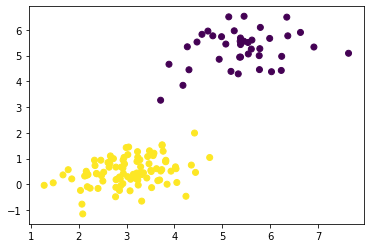

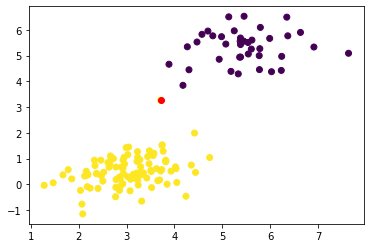

In [ ]:
ind2 = y.reshape(-1)!=y_predict_cuadratico.reshape(-1)
ind2.shape
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()
plt.scatter(X[:,0], X[:,1], c = y_predict_cuadratico)
plt.scatter(X[ind2,0], X[ind2, 1], c = "r")

In [ ]:
 from sklearn.metrics import confusion_matrix
 

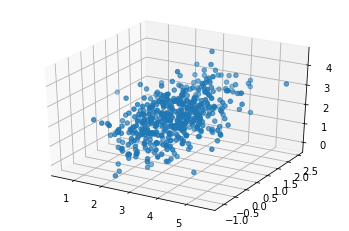

(3,) (3, 3)
[0.93534189 0.41918871 0.16045488]
(500, 2)


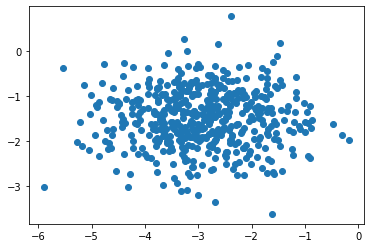

In [ ]:
mu3 = np.array([3,0.5,2]) #.fit -> estimar la mu1
cov3 = np.array([[0.5, 0.2,0.1],[0.2,0.4,0.3],[0.1,0.3,0.6]]) #.fit -> estimar la cov1
N3 = 500 # numero puntos c1 -> estimar desde etiquetas
pdf3 = mn(mu3, cov3) # objeto scipy ara evaluar o muestrear gaussiana multivariada

#X = np.r_[pdf1.rvs(size=N1),pdf2.rvs(size=N2)]
X3 = pdf3.rvs(size=N3)

X3.shape
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X3[:,0],X3[:,1],X3[:,2])
plt.show()
#pca
C = np.cov(X3.T)
[val,vec]=np.linalg.eig(C)
print(val.shape,vec.shape)
print(val)
Z = X3 @ vec[:,:2] # N x P  P x P
print(Z.shape)
plt.scatter(Z[:,0],Z[:,1])

In [ ]:
pdf1.pdf(mu1)

0.23993510443917412

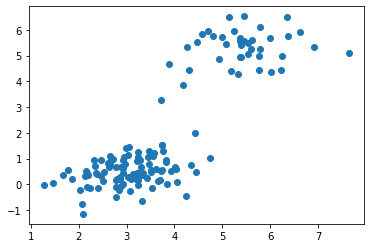

In [ ]:
 ye = np.c_[pdf1.pdf(X),pdf2.pdf(X)] #transform -> evaluar pdf despues de encontrar mu_c y Cov_c

plt.scatter(X[:,0],X[:,1])#,c=ye.argmax(axis=1))

(795, 960, 2)


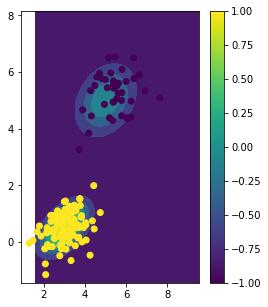

In [ ]:
# predict
dc1 = pdf1.pdf(pos) # pdf1.pdf(Xtest)
dc2 = pdf2.pdf(pos) # pdf2.pdf(Xtest)
pb = np.zeros((dc1.shape[0],dc2.shape[1],2))
pb[:,:,0] = dc1 #* (N1/X.shape[0]) #marginal cada clase
pb[:,:,1] = dc2 #* (N2/X.shape[0])
#ytest_e = pb.argmax(axis=2) # etiquetas estimadas

print(pb.shape)
plt.figure(figsize=(4,5))
plt.contourf(xx, yy,pb.max(axis=2))
plt.scatter(X[:,0],X[:,1], c=y)
plt.colorbar()

In [ ]:
pb.shape

(795, 960, 2)

El clasificador cuadratico asume distribucion gaussiana.


# Conclusión:
El objetivo de la tarea era realizar la clasificación de dos gaussianas en 2d con los clasificadores de Bayes- ingenuo y Bayes-cuadratico.
Consiste en  clasificar ciertos datos de 2 clases, segun unos datos nuevos y clasificarlos segun sea correspondiente si a la primera o la segunda Gaussiana por eso en las graficas se separan los datos (según sea de la primera o la segunda clase. "amarillo o azul"). Esto en ambos clasificadores.
Los resultados de los clasificadores fueron muy similares, aunque fue más acertivo el clasificador de Bayes-ingenuo, ya que en el clasificador de Bayes-cuadratico se pinto uno de los puntos de color rojo, esto quiere decir que se clasifico mal, el punto era de una de las gaussianas y se clasifico en la otra, cosa que no ocurrio en el ingenuo y se concluye que para este ejercicio fue mas efectico el clasificador de Bayes-ingenuo. 